In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Read Data

In [3]:
data = pd.read_csv("Titanic_train.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Examination

In [155]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [157]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

### Visualisation

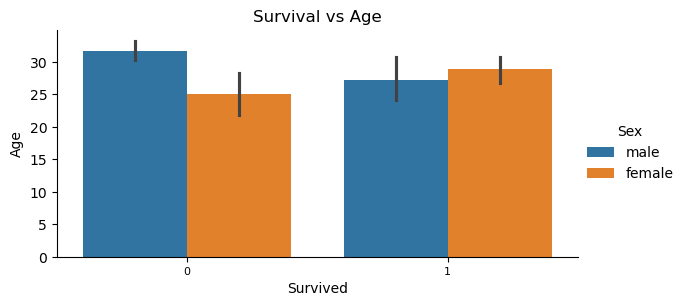

In [158]:
sns.catplot(data, x='Survived',
            y='Age', 
            kind = 'bar',
            height=3, 
            aspect=2,
            hue='Sex'
           )
plt.title('Survival vs Age')
plt.xticks(fontsize=8)
plt.show()

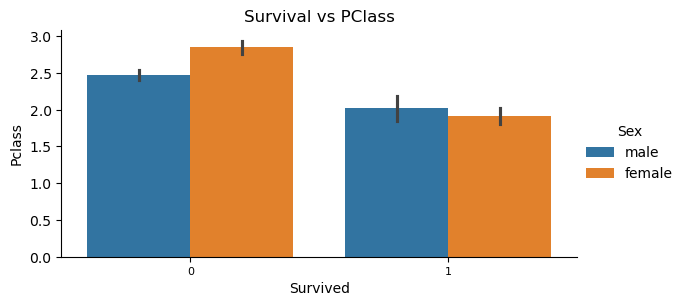

In [159]:
sns.catplot(data, x='Survived',
            y='Pclass', 
            kind = 'bar',
            height=3, 
            aspect=2,
            hue='Sex'
           )
plt.title('Survival vs PClass')
plt.xticks(fontsize=8)
plt.show()

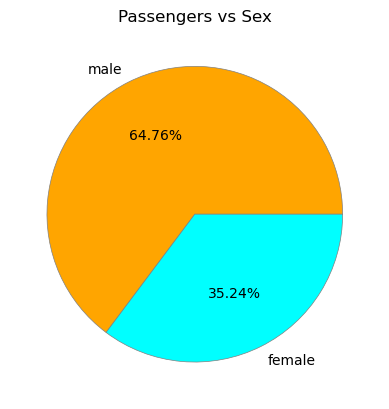

In [160]:
# PROPORTION OF CARS WITH DIFFERENT FUEL TYPE
plt.title("Passengers vs Sex"),
plt.pie(data['Sex'].value_counts(),labels=['male','female'],
       autopct='%0.2f%%',
       textprops={'fontsize':10},
       wedgeprops={'edgecolor':'grey','linewidth':0.5},
    colors=['orange','cyan','grey']
       )
plt.show()

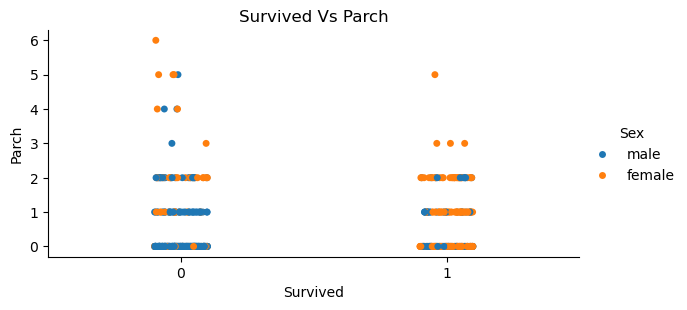

In [161]:
sns.catplot(
    data,
    x='Survived',
    y='Parch',
    kind='strip',
    height=3,
    aspect=2,
    hue='Sex'
)
plt.title("Survived Vs Parch")
plt.show()

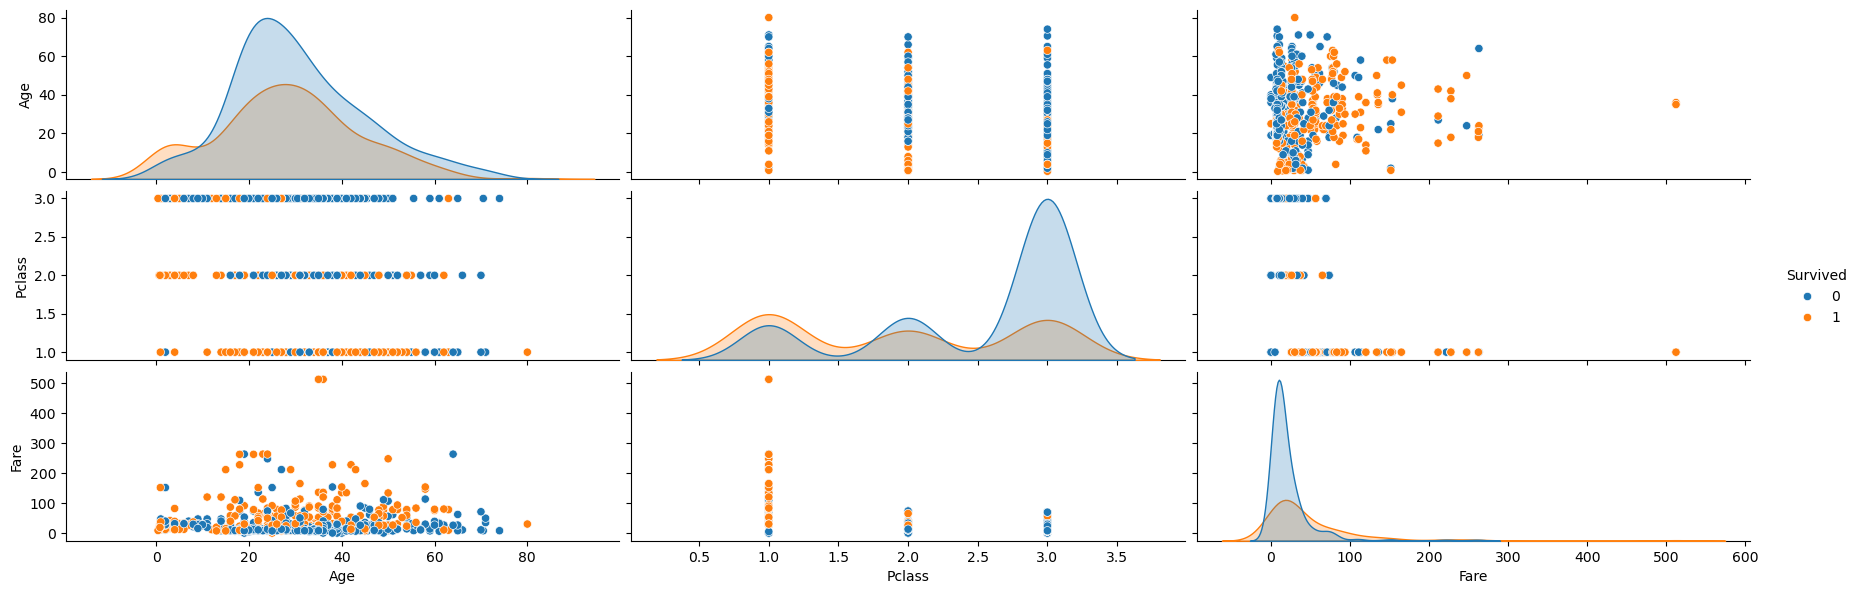

In [162]:
data_p=data[['Age','Pclass','Fare','Survived']]
sns.pairplot(data_p,hue='Survived',palette='tab10',height=2,aspect=3)
plt.show()

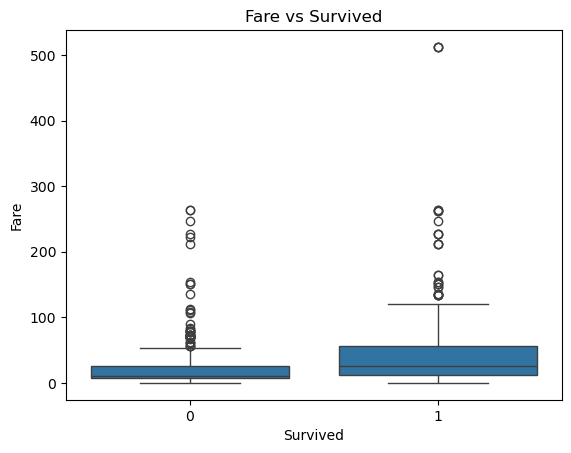

In [163]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare vs Survived')
plt.show()


### Data Preprocessing

#### Given that the target variable is 'Survived', we can omit certain columns such as Ticket, Cabin, PassengerID, Name

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Replace Null Values

There are null values in Age and Embarked which can be replaced, while that in Cabin is around 77% which is best to drop the column

In [165]:
mean_age=data['Age'].mean()
np.round(mean_age,0)

30.0

In [166]:
mode_embarked=data['Embarked'].mode()[0]
mode_embarked

'S'

In [167]:
data.fillna(
    {
        'Age':mean_age,
        'Embarked':mode_embarked
    },inplace=True
)

In [168]:
data= pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [176]:
X_Train = data[['Pclass','Age','SibSp','Parch','Embarked_Q','Embarked_S','Sex_male']]
Y_Train=data['Survived']

In [177]:
X_train

,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,
332,1,45.500000,0,0,False,True,True
734,2,23.000000,0,0,False,True,True
383,3,32.000000,0,0,False,True,True
705,3,26.000000,1,0,False,True,True
814,3,6.000000,4,2,False,True,False
...,...,...,...,...,...,...,...
107,3,21.000000,0,0,False,True,False
271,1,29.699118,0,0,False,True,True
861,3,41.000000,2,0,False,True,True


In [178]:
Y_Train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [179]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

#### Evaluate Training of Model

In [193]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
yhat_train=model.predict(X_train)

#### Confusion Matrix

In [182]:
cm=confusion_matrix(Y_train,yhat_train)
cm

array([[385,  59],
       [ 82, 186]], dtype=int64)

##### In Training, FP and FN are considerably moderate

#### Classification Report

In [192]:
print(classification_report(Y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.76      0.69      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



The model achieved an overall **accuracy of 80%**, which means it correctly predicted survival outcomes 8 out of 10 times. For the **precision**, it performed better on predicting deaths (class 0) with 82% precision, indicating that when it predicts someone did not survive, it's usually correct. For survivors (class 1), the precision was slightly lower at 76%, meaning more false positives occurred for survival predictions.

In terms of **recall**, the model correctly identified 87% of the people who died but only 69% of those who survived, showing it misses some actual survivors. The **F1-score**, which balances precision and recall, was 0.85 for deaths and 0.73 for survivors, reflecting stronger performance in identifying non-survivors compared to survivors.


#### AUC ROC Curve

In [194]:
fpr,tpr,thresh=roc_curve(Y_train,yhat_train)
auc=roc_auc_score(Y_train,yhat_train)
auc

0.7805734839316929

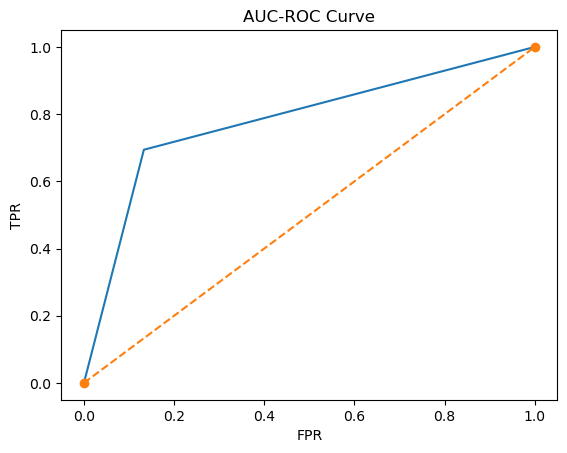

In [196]:
plt.title('AUC-ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'o--')

##### Predictive power of the model is well and defined by the AUC-ROC curve and with an AUC Score of 78%

### Curate the test data

In [183]:
data_test = pd.read_csv("Titanic_test.csv",index_col='PassengerId')
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [184]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [185]:
mean_age=data_test['Age'].mean()
np.round(mean_age,0)

30.0

In [186]:
mode_embarked=data_test['Embarked'].mode()[0]
mode_embarked

'S'

In [187]:
data_test.fillna(
    {
        'Age':mean_age,
        'Embarked':mode_embarked
    },inplace=True
)

In [188]:
data_test= pd.get_dummies(data_test, columns=['Sex', 'Embarked'], drop_first=True)

In [189]:
test_X = data_test[['Pclass','Age','SibSp','Parch','Embarked_Q','Embarked_S','Sex_male']]

In [191]:
test_X

,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,
892,3,34.50000,0,0,True,False,True
893,3,47.00000,1,0,False,True,False
894,2,62.00000,0,0,True,False,True
895,3,27.00000,0,0,False,True,True
896,3,22.00000,1,1,False,True,False
...,...,...,...,...,...,...,...
1305,3,30.27259,0,0,False,True,True
1306,1,39.00000,0,0,False,False,False
1307,3,38.50000,0,0,False,True,True


### Dump Model

In [198]:
import pickle
pickle.dump(model,open('clf.pkl','wb'))

### Model Interpretation

In [201]:
model.coef_[0]

array([-1.01999763, -0.03151914, -0.28078328, -0.08177025, -0.11751886,
       -0.4606727 , -2.59119195])

The logistic regression model's coefficients reveal how each feature influences the likelihood of survival on the Titanic. The most influential factor is Sex_male, with a coefficient of -2.59, indicating that being male significantly reduced the chances of survival.

Passenger class (Pclass) also had a strong negative effect (-1.02), meaning passengers in lower classes were less likely to survive. Age has a small negative coefficient (-0.03), suggesting that older passengers faced slightly lower odds of survival.

Both SibSp and Parch (representing family aboard) show minor negative impacts, implying that traveling with family did not greatly improve survival chances. 

The boarding location also played a role: passengers who (Embarked_Q) had slightly lower odds, while those from (Embarked_S) surprisingly had higher survival odds—though this may be specific to this dataset. Overall, gender and class were the most significant predictors in determining survival.

### Interview Questions

**1. Difference Between Precision and Recall:**
Precision and recall are key metrics in evaluating binary classification models. Precision measures how many of the predicted positive instances are actually positive — it's the ratio of true positives to total predicted positives. High precision means fewer false positives. Recall, on the other hand, indicates how many actual positives the model correctly identified — it's the ratio of true positives to total actual positives. High recall means fewer false negatives. While precision emphasizes the accuracy of positive predictions, recall emphasizes the ability of capturing actual positives.



**2. What is Cross-Validation and Its Importance:**
Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. In k-fold cross-validation, the dataset is split into k equal parts; the model trains on k-1 parts and tests on the remaining part. This process repeats k times, each time with a different test set, and the results are averaged. This approach prevents overfitting and gives a more accurate estimate of model performance than a single train-test split. In binary classification, cross-validation helps ensure the model performs well across different subsets and isn't biased due to data imbalance or random partitioning.
